#### Linear Classification algorithm

In [1]:
### Data creation
import numpy as np

mean1 = np.array([1,0.5])
cov1 = np.array([[1,0.1],[0.1,1.2]])

mean2 = np.array([4,5])
cov2 = np.array([[1.21,0.1],[0.1,1.3]])

dist1 = np.random.multivariate_normal(mean1,cov1,500)
dist2 = np.random.multivariate_normal(mean2,cov2,500)

print(dist1.shape)
print(dist2.shape)

data = np.zeros((1000,3))
print(data.shape)

data[:500,:2] = dist1
data[500:,:2] = dist2
data[500:,-1] = 1.0

np.random.shuffle(data)
split = int(0.8*data.shape[0])

X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(500, 2)
(500, 2)
(1000, 3)
(800, 2) (200, 2)
(800,) (200,)


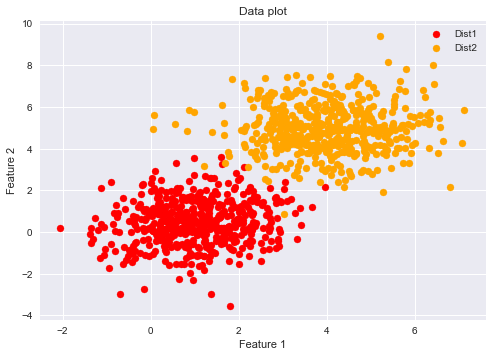

In [2]:
### Visulize data
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.scatter(dist1[:,0],dist1[:,1],color='red',label='Dist1')
plt.scatter(dist2[:,0],dist2[:,1],color='orange',label='Dist2')
plt.title('Data plot')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [136]:
### Model 
class LinearClassifier:
    def __init__(self,X,Y):
        """Initialize the data"""
        self.X = X
        self.Y = Y
        
    def sigmoid(self,x):
        """Convert the value in range 0 to 1 useful for the binary classification else softmax"""
        val = 1.0/(1 + np.exp(-1.0 * x))
        return val
    
    def hypothesis(self,theta,x):
        """Return the value of y on the in y= mx + c and sigmoid of that {0,1}"""
        return self.sigmoid(np.dot(theta,x))
    
    def errorFn(self,theta):
        """Being a classification algo we use log liklihood"""
        error = 0.0
        X = self.X
        Y = self.Y
        for i in range(X.shape[0]):
            hx = self.hypothesis(theta,X[i])
            error += Y[i]*np.log2(hx) + (1-Y[i])*np.log2(1-hx)
        return -error/X.shape[0]
    
    def gradientDescent(self,theta,learning_rate):
        """Implement the gradient descent algo"""
        grad = np.zeros((theta.shape[0],))
        X = self.X
        Y = self.Y
        
        for i in range(X.shape[0]):
            hx = self.hypothesis(theta,X[i])
            grad = grad + (Y[i] - hx)*X[i]
        
        theta = theta + learning_rate*grad
        return theta
    
    def fit(self,learning_rate):
        """Train the model"""
        theta = np.zeros((self.X.shape[1],))
        itr = 100
        currItr = 0
        errorList = []
        while itr>=currItr:
            errorList.append(self.errorFn(theta))
            theta = self.gradientDescent(theta,learning_rate)
            currItr += 1
        return errorList,theta
    
    def changeVariable(self):
        """Chaneg the variable to satisfy the intercept in theta"""
        one = np.ones((self.X.shape[0],1))
        self.X = np.hstack((one,self.X))
        return
    
    def changeVariableTest(self,x):
        """Chaneg the variable to satisfy the intercept in theta"""
        one = np.ones((1,))
        x = np.hstack((one,x))
        return x
        
    def predict(self,x,theta):
        """Return the prediction"""
        x = np.concatenate((np.array([1]),x))
        confidence = self.hypothesis(x,theta)
        if confidence<0.5:
            return 0
        else:
            return 1
    
    def verifyModelByError(self,errorList):
        """Help in checking if error is reducing"""
        import matplotlib.pyplot as plt
        plt.style.use("seaborn") ##My fav
        plt.plot(errorList)
        plt.title("Error plot")
        plt.xlabel("Iteration number")
        plt.ylabel("Error")
        plt.show()
        return 

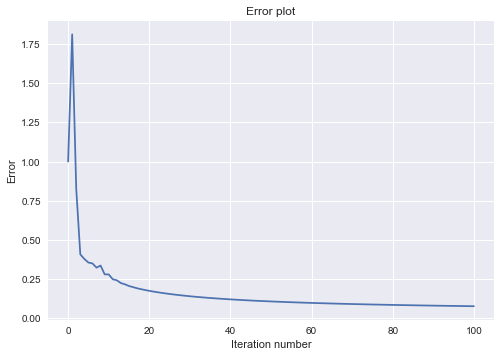

1

In [137]:
lc = LinearClassifier(X_train,Y_train)
lc.changeVariable()
errorList,theta = lc.fit(0.002)
lc.verifyModelByError(errorList)
lc.predict(X_train[1],theta)

In [99]:
print(lc.predict(X_train[9],theta))
print(Y_train[9])

1
1.0


#### Training model on chemical detection data

In [134]:
import pandas as pds

X = pds.read_csv('Logistic_X_Train.csv')
Y = pds.read_csv('Logistic_Y_Train.csv')

print(type(X),type(Y),"\n\n\n")

### Statical data analysis
print(X.describe())

### Extracting the values
uncleanedX = X.values

changedX = (uncleanedX - uncleanedX.mean()) / uncleanedX.std()
Y = Y.values

### Standardization
print("The mean of the standardise data is {}".format(changedX.mean()))
print("The std of the standardise data is {} \n\n\n".format(changedX.std()))

xDf = pds.DataFrame(changedX)
print(xDf.describe())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> 



                f1           f2           f3
count  3000.000000  3000.000000  3000.000000
mean      0.007453     0.999286     0.029487
std       1.334138     1.023853     1.209558
min      -3.470773    -3.692615    -3.286481
25%      -1.045220     0.325665    -0.986959
50%      -0.144115     1.004693     0.225411
75%       1.052555     1.693354     1.041319
max       3.741376     4.185015     2.706148
The mean of the standardise data is 3.789561257387201e-17
The std of the standardise data is 1.0 



                 0            1            2
count  3000.000000  3000.000000  3000.000000
mean     -0.263594     0.510003    -0.246409
std       1.040584     0.798572     0.943416
min      -2.976499    -3.149528    -2.832757
25%      -1.084646    -0.015399    -1.039204
50%      -0.381813     0.514220    -0.093594
75%       0.551551     1.051354     0.542787
max       2.648745     2.994769     1.841300


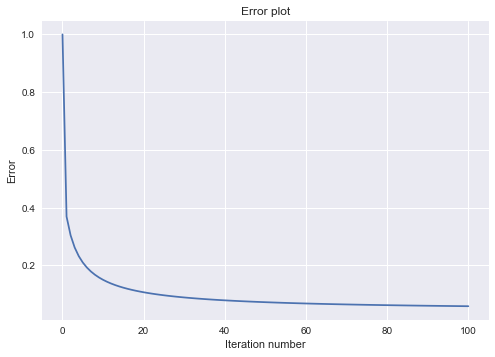

In [138]:
lc = LinearClassifier(changedX,Y)
lc.changeVariable()
errorList,theta = lc.fit(0.001)
lc.verifyModelByError(errorList)

In [142]:
print(lc.predict(changedX[110],theta))
print(Y[110])

0
[0]
